# Imports

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt


# Data Exploration

In [69]:
# Load
file_path = 'data/training_data.csv'
data = pd.read_csv(file_path)


/tmp/ipykernel_26878/1706297877.py:3: DtypeWarning: Columns (25,30,36,37,43,57) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


In [70]:
# make sure pd show all columns
pd.set_option('display.max_columns', None)


In [71]:
data.head()


,Unnamed: 0,GDENAMK,GDENR,KTKZ,address,appartments,area,area_useable,balcony,basement,bath,bath_tube,cabletv,ceiling,cheminee,date,descr,dishwasher,dryer,elevator,floors,furnished,garden_m2,gardenshed,heating_air,heating_earth,heating_electro,heating_far,heating_gas,heating_oil,heating_pellets,home_type,kids_friendly,lat,laundry,lon,manlift,middle_house,minergie,month,msregion,newly_built,oldbuilding,oven,parking_indoor,parking_outside,pets,playground,pool,quarter_general,quarter_specific,quiet,raised_groundfloor,rent_full,rooms,shared_flat,shopping,shower,size_land,sunny,terrace,toilets,topstorage,veranda,water,wheelchair,year,year_built,Micro_rating,Micro_rating_NoiseAndEmission,Micro_rating_Accessibility,Micro_rating_DistrictAndArea,Micro_rating_SunAndView,Micro_rating_ServicesAndNature,wgh_avg_sonnenklasse_per_egid,Anteil_auslaend,Avg_age,Avg_size_household,Noise_max,anteil_efh,apoth_pix_count_km2,avg_anzhl_geschosse,avg_bauperiode,dist_to_4G,dist_to_5G,dist_to_haltst,dist_to_highway,dist_to_lake,dist_to_main_stat,dist_to_school_1,dist_to_train_stat,restaur_pix_count_km2,superm_pix_count_km2,dist_to_river,key
0,1,Cossonay,5477,VD,1304 Cossonay-Ville,NaN,95.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.08.2019,"Bonjour, Nous remettons notre appartement de 3...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wohnung,NaN,46.612988,NaN,6.500815,NaN,NaN,NaN,8,90,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3.2019,NaN,NaN,1600,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,NaN,2.210,6.333333,2.357143,0.432432,1,3.333333,2.263364,NaN,NaN,NaN,32,NaN,0,NaN,NaN,550.027272,1930.186001,343.284139,4285.860007,850.606268,NaN,187.216452,1908.393303,0,0,1127.536484,1
1,2,Saas-Fee,6290,VS,"Hannigstrasse 45, 3906 Saas-Fee VS",NaN,40.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,23.04.2019,"Saas-Fee: 2 Zi Whg ""Saphir"" Saison-/Jahresmiet...",NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wohnung,NaN,46.109362,NaN,7.927069,NaN,NaN,NaN,4,96,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.2019,NaN,NaN,600,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,NaN,5.050,5.666667,7.071429,4.648649,8,2.833333,1.837679,0.358491,46.578313,2.333333,16,0.00000,1,4.454545,1961.363636,316.798043,59836.979950,50.596443,18871.692160,NaN,NaN,267.725606,10781.225350,16,2,1176.552105,2
2,3,Lugano,5192,TI,6962 Viganello,NaN,112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.04.2019,RIF.6238. Splendido attico 3.5 locali a Vigane...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Attika,NaN,46.013300,NaN,8.967430,NaN,NaN,NaN,4,82,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.2019,NaN,NaN,2600,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,NaN,6.150,4.722222,6.553571,4.918919,8,7.958333,1.387204,NaN,NaN,NaN,55,NaN,5,NaN,NaN,124.036285,69580.208430,115.935327,3678.544277,851.929528,1796.317344,60.166436,1796.317344,9,2,503.617894,3
3,4,Neuhausen am Rheinfall,2937,SH,"Poststrasse 11, 8212 Neuhausen am Rheinfall",NaN,104.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,03.05.2019,An zentraler Lage vermieten wir diese moderne ...,NaN,NaN,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wohnung,1.0,47.682710,NaN,8.619577,NaN,NaN,NaN,5,50,0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2,2.2019,NaN,NaN,1915,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,2011.0,5.695,4.666667,7.107143,5.500000,6,4.708333,1.485193,0.300578,51.508197,2.059524,50,0.25000,0,7.000000,1946.500000,55.659680,239.470249,90.708324,972.769243,1251.685970,404.105184,222.319590,377.810799,4,2,494.728855,4
4,5,Chavannes-des-Bois,5708,VD,1290 Versoix,NaN,180.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.05.2019,1615MC Versoix. Au sein d'un quartier résident...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wohnung,NaN,46.276757,NaN,6.168958,NaN,NaN,NaN,5,86,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.2019,NaN,NaN,5600,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,NaN,5.765,4.444444,8.321429,3.094595,9,7.125000,1.149799,0.533333,39.528090,2.277778,47,0.28125,1,3.062500,1918.531250,46.872167,2626.858580,71.449283,3793.947021,86.429425,418.852003,571.023642,418.8520

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'GDENR'}>,
        <Axes: title={'center': 'appartments'}>,
        <Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'area_useable'}>,
        <Axes: title={'center': 'balcony'}>,
        <Axes: title={'center': 'basement'}>,
        <Axes: title={'center': 'bath'}>,
        <Axes: title={'center': 'bath_tube'}>],
       [<Axes: title={'center': 'cabletv'}>,
        <Axes: title={'center': 'ceiling'}>,
        <Axes: title={'center': 'cheminee'}>,
        <Axes: title={'center': 'dishwasher'}>,
        <Axes: title={'center': 'dryer'}>,
        <Axes: title={'center': 'elevator'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'furnished'}>,
        <Axes: title={'center': 'garden_m2'}>],
       [<Axes: title={'center': 'gardenshed'}>,
        <Axes: title={'center': 'heating_electro'}>,
        <Axes: title={'center': 'heating_gas'}>,
        <Axes: title={'ce

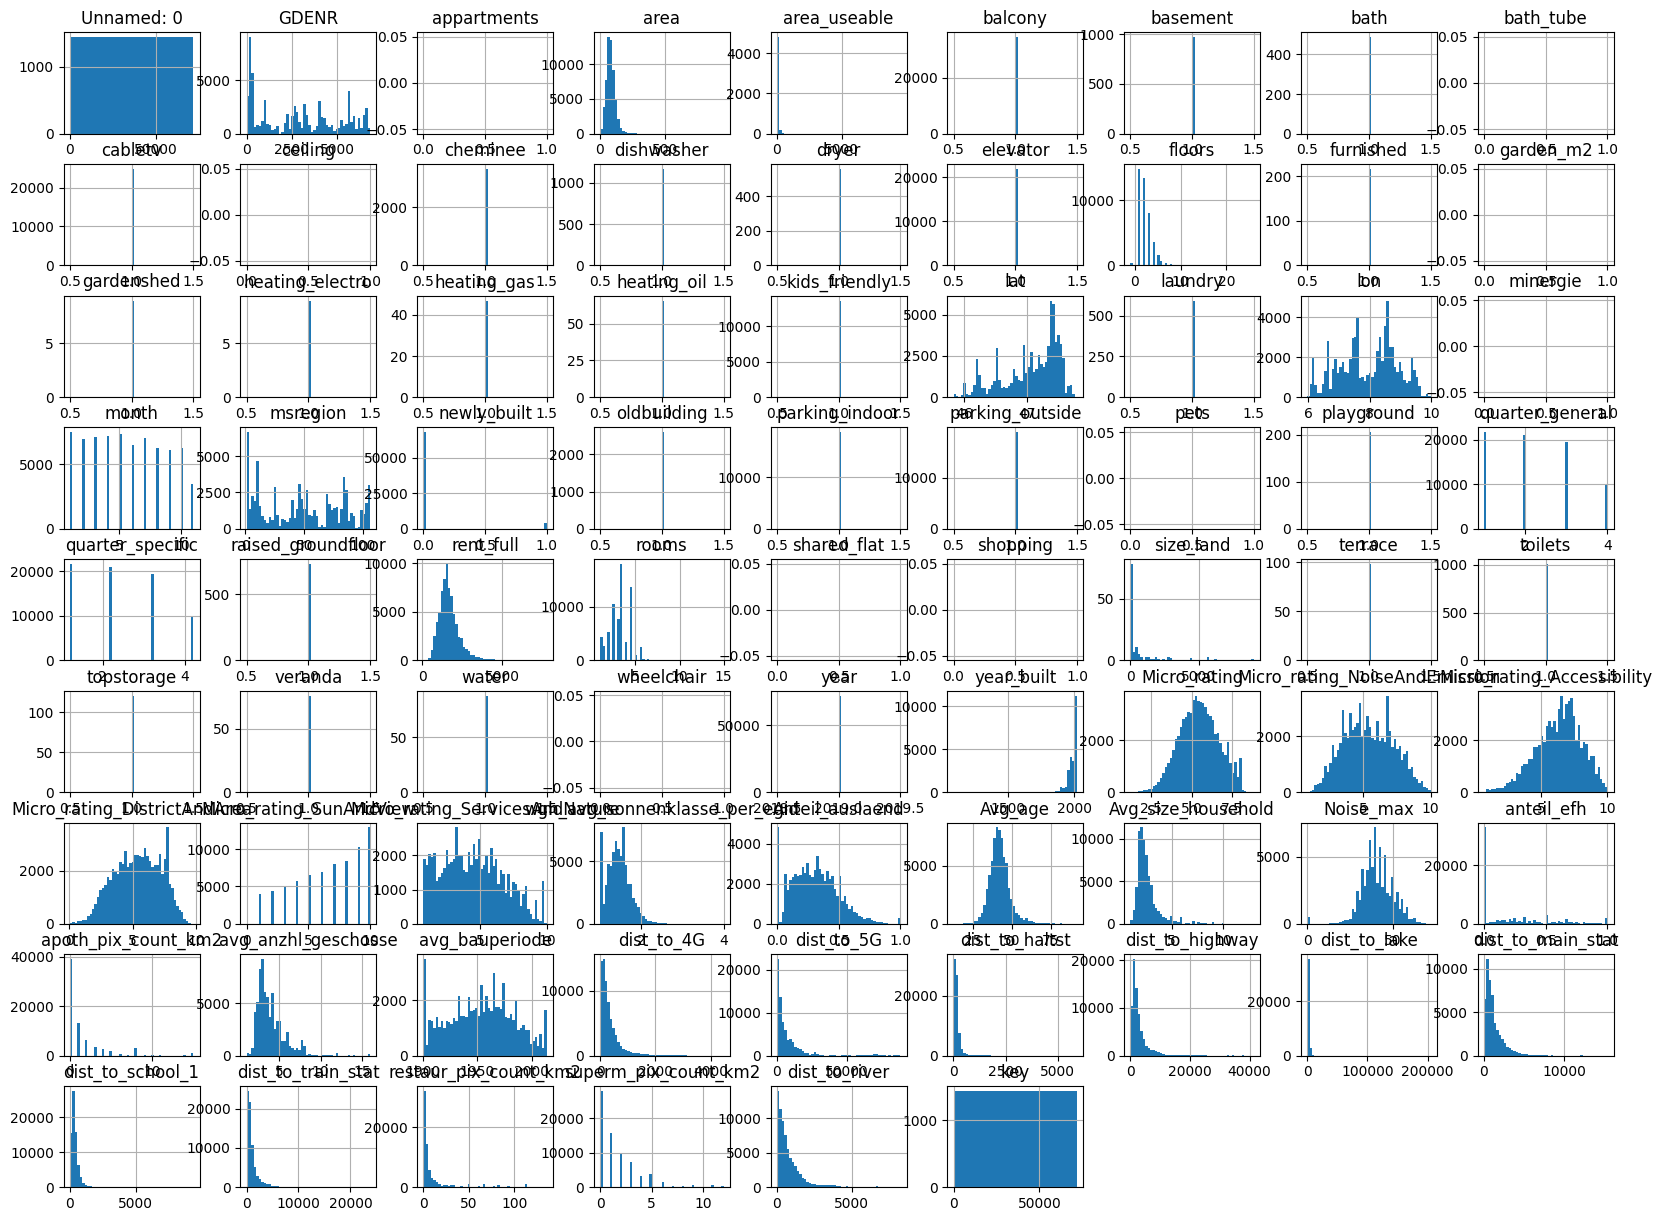

In [72]:
data.hist(bins=50, figsize=(20,15))


In [ ]:
# Define the parameters list
column_to_exclude = 'rent_full'
params_list = [col for col in data.columns if col != column_to_exclude]

# Define the number of rows and columns for subplots
n_rows = len(params_list) // 3 + (len(params_list) % 3 > 0)  # 3 plots per row
n_cols = 3

# Create a figure and axes for the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))

# Flatten the axes array for easy iteration if there's more than one row
axes = axes.flatten()

# Loop over the parameters and create scatter plots
for i, param in enumerate(params_list):
    ax = axes[i]
    ax.scatter(data[param], data['rent_full'])  # Replace 'rent' with your rent column name
    ax.set_title(f'{param} vs Rent')
    ax.set_xlabel(param)
    ax.set_ylabel('Rent')

# Hide any unused subplots
for i in range(len(params_list), n_rows * n_cols):
    fig.delaxes(axes[i])

# Adjust the layout
plt.tight_layout()
plt.show()


In [73]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72000 entries, 0 to 71999
Data columns (total 95 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      72000 non-null  int64  
 1   GDENAMK                         72000 non-null  object 
 2   GDENR                           72000 non-null  int64  
 3   KTKZ                            72000 non-null  object 
 4   address                         72000 non-null  object 
 5   appartments                     0 non-null      float64
 6   area                            57678 non-null  float64
 7   area_useable                    4963 non-null   float64
 8   balcony                         34583 non-null  float64
 9   basement                        971 non-null    float64
 10  bath                            487 non-null    float64
 11  bath_tube                       0 non-null      float64
 12  cabletv                         

# Data Cleaning

In [74]:
# Delete all columns with only one value inside

for key in data.columns.tolist():
    if data[f"{key}"].unique().shape[0] == 1:
        data.drop(f"{key}", axis=1, inplace=True)


In [75]:
# area_usable
data['min_area'] = np.fmin(data['area'], data['area_useable'])
data['min_area'].fillna(data['min_area'].median(skipna=True), inplace=True)


In [76]:
# Replace NaN with 0
nan0_list = ['balcony', 'basement', 'cabletv', 'cheminee', 'dishwasher', 'dryer',
             'elevator', 'furnished', 'gardenshed', 'heating_air', 'heating_earth',
             'heating_far', 'heating_electro', 'heating_gas', 'heating_oil', 'heating_pellets',
             'kids_friendly', 'laundry', 'manlift', 'middle_house', 'oldbuilding',
             'oven', 'parking_indoor', 'parking_outside', 'playground', 'pool',
             'quiet', 'raised_groundfloor', 'shower', 'size_land', 'sunny', 'terrace',
             'topstorage', 'veranda', 'water']
data.update({item: data[item].fillna(0) for item in nan0_list})

nan1_list = ['bath', 'floors', 'toilets']
data.update({item: data[item].fillna(1) for item in nan1_list})


In [83]:
# Drop rows that are not valuable to regression

low_val_list = ['Unnamed: 0', 'area', 'area_useable', 'descr', 'GDENAMK', 'GDENR', 'KTKZ', 'address',  'date', 'quarter_general', 'quarter_specific', 'year_built']
data.drop(columns=low_val_list, inplace=True)


KeyError: "['Unnamed: 0', 'area', 'area_useable', 'GDENAMK', 'GDENR', 'KTKZ', 'address', 'date', 'quarter_general', 'quarter_specific'] not found in axis"

In [ ]:
# replacing rooms:

# Modify bins to include np.inf for an open-ended last bin
bins = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, np.inf]

# Adjust labels to include an 'Over' label for the open-ended bin
labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins)-2)] + [f"Over {bins[-2]}"]

# Apply the cut function to create the 'area_group' column
data['area_group'] = pd.cut(data['min_area'], bins=bins, labels=labels)

# Step 2: Group by 'area_group' and calculate the mean of 'rooms'
mean_rooms_by_area_group = data.groupby('area_group')['rooms'].mean()

# Step 3: Replace NaN values in 'rooms' with the mean rooms of the corresponding 'area_group'
data['rooms'] = data.groupby('area_group')['rooms'].transform(lambda x: x.fillna(x.mean()))

# Rows with min_area over 300 don't have room numbers listed so we try an educated guess

# Step 4: Filter the dataset for 'min_area' between 200 and 300
group_200_to_300 = data[(data['min_area'] >= 200) & (data['min_area'] < 300)]

# Calculate the average rooms per square meter for this group
avg_rooms_per_sqm_200_to_300 = (group_200_to_300['rooms'] / group_200_to_300['min_area']).dropna().mean()

# Step 5: Apply this average rooms per square meter to estimate the room number for larger estates with 'min_area' over 300
data.loc[data['min_area'] > 300, 'rooms'] = data['min_area'] * avg_rooms_per_sqm_200_to_300

# Round for all rooms to .5
data['rooms'] = data['rooms'].apply(lambda x: np.round(x * 2) / 2)


In [93]:
# Count rows with NaN values
nan_list = data.isna().sum()


In [94]:
pd.set_option('display.max_rows', None)
nan_list


balcony                           0
basement                          0
bath                              0
cabletv                           0
cheminee                          0
dishwasher                        0
dryer                             0
elevator                          0
floors                            0
furnished                         0
gardenshed                        0
heating_air                       0
heating_earth                     0
heating_electro                   0
heating_far                       0
heating_gas                       0
heating_oil                       0
heating_pellets                   0
home_type                         0
kids_friendly                     0
lat                               0
laundry                           0
lon                               0
manlift                           0
middle_house                      0
month                             0
msregion                          0
newly_built                 

In [101]:
data.head()


,balcony,basement,bath,cabletv,cheminee,dishwasher,dryer,elevator,floors,furnished,gardenshed,heating_air,heating_earth,heating_electro,heating_far,heating_gas,heating_oil,heating_pellets,home_type,kids_friendly,lat,laundry,lon,manlift,middle_house,month,msregion,newly_built,oldbuilding,oven,parking_indoor,parking_outside,playground,pool,quiet,raised_groundfloor,rent_full,rooms,shower,size_land,sunny,terrace,toilets,topstorage,veranda,water,Micro_rating_NoiseAndEmission,Micro_rating_Accessibility,Micro_rating_DistrictAndArea,Micro_rating_SunAndView,Micro_rating_ServicesAndNature,min_area
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0,Wohnung,0.0,46.612988,0.0,6.500815,0,0,8,90,0,0.0,0,0.0,0.0,0.0,0,0,0.0,1600,3.5,0,0.0,0,0.0,1.0,0.0,0.0,0.0,6.333333,2.357143,0.432432,1,3.333333,95.0
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0,Wohnung,0.0,46.109362,0.0,7.927069,0,0,4,96,0,0.0,0,0.0,0.0,0.0,0,0,0.0,600,2.0,0,0.0,0,0.0,1.0,0.0,0.0,0.0,5.666667,7.071429,4.648649,8,2.833333,40.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0,Attika,0.0,46.013300,0.0,8.967430,0,0,4,82,0,0.0,0,0.0,0.0,0.0,0,0,0.0,2600,3.5,0,0.0,0,0.0,1.0,0.0,0.0,0.0,4.722222,6.553571,4.918919,8,7.958333,112.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0,Wohnung,1.0,47.682710,0.0,8.619577,0,0,5,50,0,0.0,0,1.0,0.0,0.0,0,0,0.0,1915,3.5,0,0.0,0,0.0,1.0,0.0,0.0,0.0,4.666667,7.107143,5.500000,6,4.708333,104.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0,Wohnung,0.0,46.276757,0.0,6.168958,0,0,5,86,0,0.0,0,0.0,0.0,0.0,0,0,0.0,5600,6.0,0,0.0,0,0.0,1.0,0.0,0.0,0.0,4.444444,8.321429,3.094595,9,7.125000,180.0


In [102]:
# For now, drop columns with string values

droplist = ['home_type']

data.drop(columns=droplist, inplace=True)


In [92]:
# For now, focus on categorical micro ratings:

drop_micros_list = ['Micro_rating', 'wgh_avg_sonnenklasse_per_egid', 'Anteil_auslaend', 'Avg_age', 'Avg_size_household',
                    'Noise_max', 'anteil_efh', 'apoth_pix_count_km2', 'avg_anzhl_geschosse', 'avg_bauperiode', 'dist_to_4G',
                    'dist_to_5G', 'dist_to_haltst', 'dist_to_highway', 'dist_to_lake', 'dist_to_main_stat', 'dist_to_school_1',
                    'dist_to_train_stat', 'restaur_pix_count_km2', 'superm_pix_count_km2', 'dist_to_river', 'key', 'area_group']

data.drop(columns=drop_micros_list, inplace=True)


In [53]:
catergory = "rooms"

median_min_area = data[catergory].median(skipna=True)
print(median_min_area)
mean_min_area = data[catergory].mean(skipna=True)
print(mean_min_area)


3.5
3.298198300929357


In [98]:
data.head()


,balcony,basement,bath,cabletv,cheminee,dishwasher,dryer,elevator,floors,furnished,gardenshed,heating_air,heating_earth,heating_electro,heating_far,heating_gas,heating_oil,heating_pellets,home_type,kids_friendly,lat,laundry,lon,manlift,middle_house,month,msregion,newly_built,oldbuilding,oven,parking_indoor,parking_outside,playground,pool,quiet,raised_groundfloor,rent_full,rooms,shower,size_land,sunny,terrace,toilets,topstorage,veranda,water,Micro_rating_NoiseAndEmission,Micro_rating_Accessibility,Micro_rating_DistrictAndArea,Micro_rating_SunAndView,Micro_rating_ServicesAndNature,min_area
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0,Wohnung,0.0,46.612988,0.0,6.500815,0,0,8,90,0,0.0,0,0.0,0.0,0.0,0,0,0.0,1600,3.5,0,0.0,0,0.0,1.0,0.0,0.0,0.0,6.333333,2.357143,0.432432,1,3.333333,95.0
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0,Wohnung,0.0,46.109362,0.0,7.927069,0,0,4,96,0,0.0,0,0.0,0.0,0.0,0,0,0.0,600,2.0,0,0.0,0,0.0,1.0,0.0,0.0,0.0,5.666667,7.071429,4.648649,8,2.833333,40.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0,Attika,0.0,46.013300,0.0,8.967430,0,0,4,82,0,0.0,0,0.0,0.0,0.0,0,0,0.0,2600,3.5,0,0.0,0,0.0,1.0,0.0,0.0,0.0,4.722222,6.553571,4.918919,8,7.958333,112.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0,Wohnung,1.0,47.682710,0.0,8.619577,0,0,5,50,0,0.0,0,1.0,0.0,0.0,0,0,0.0,1915,3.5,0,0.0,0,0.0,1.0,0.0,0.0,0.0,4.666667,7.107143,5.500000,6,4.708333,104.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0,Wohnung,0.0,46.276757,0.0,6.168958,0,0,5,86,0,0.0,0,0.0,0.0,0.0,0,0,0.0,5600,6.0,0,0.0,0,0.0,1.0,0.0,0.0,0.0,4.444444,8.321429,3.094595,9,7.125000,180.0


# Regression

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [103]:
# Let's assume 'X' is our features dataframe and 'y' is our target series
X = data.drop(columns=['rent_full'])  # replace 'target_column' with the actual name of your target column
y = data['rent_full']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize the model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Predict the target for the test set
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 225403.35196461063
R^2 Score: 0.506563842969258


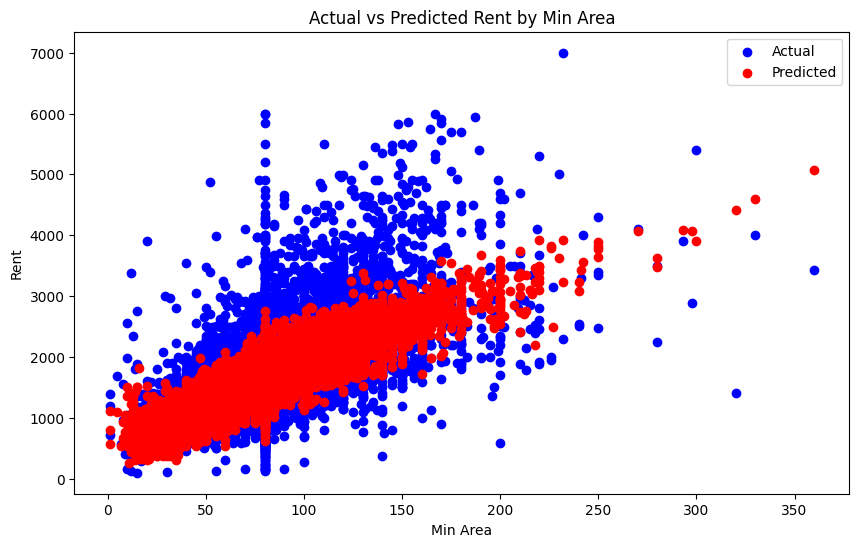

In [109]:
# Plotting the actual vs predicted values

plt.figure(figsize=(10, 6))



# Scatter plot for actual values

plt.scatter(X_test['min_area'], y_test, color='blue', label='Actual')



# Scatter plot for predicted values

plt.scatter(X_test['min_area'], y_pred, color='red', label='Predicted')



# Labels and Legend

plt.title('Actual vs Predicted Rent by Min Area')

plt.xlabel('Min Area')

plt.ylabel('Rent')

plt.legend()

plt.show()


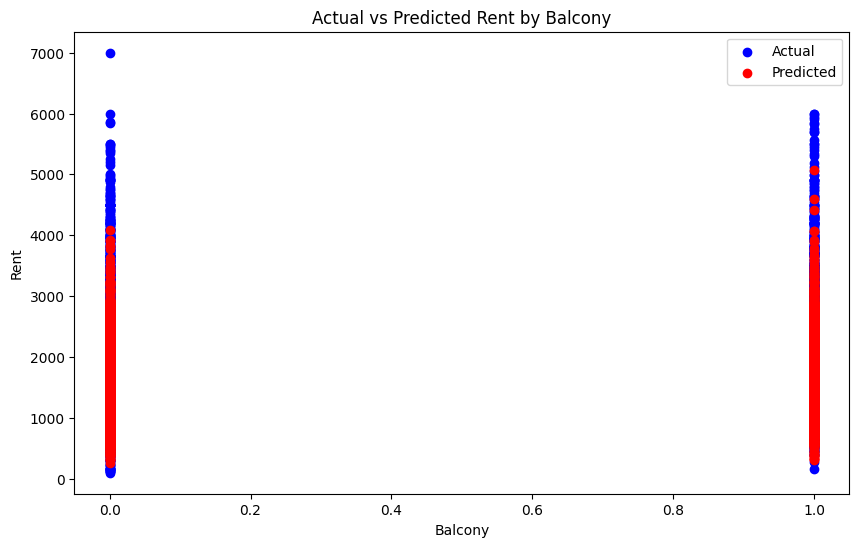

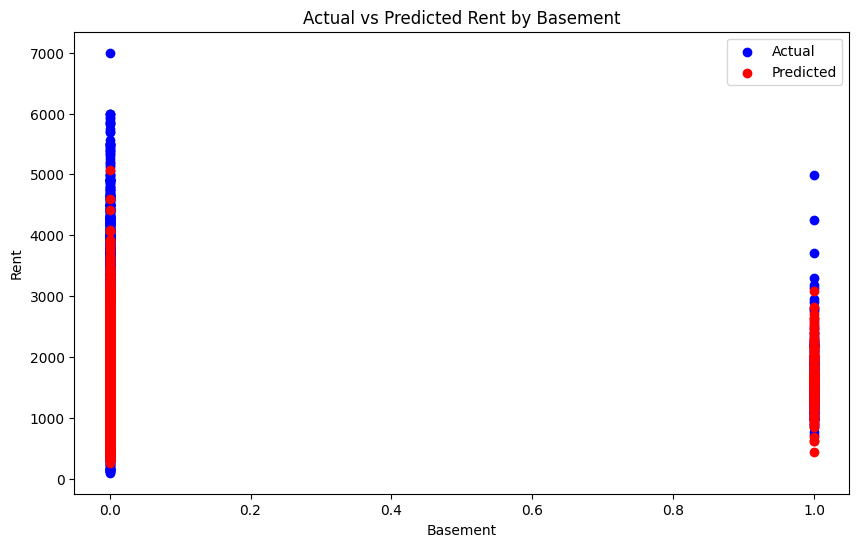

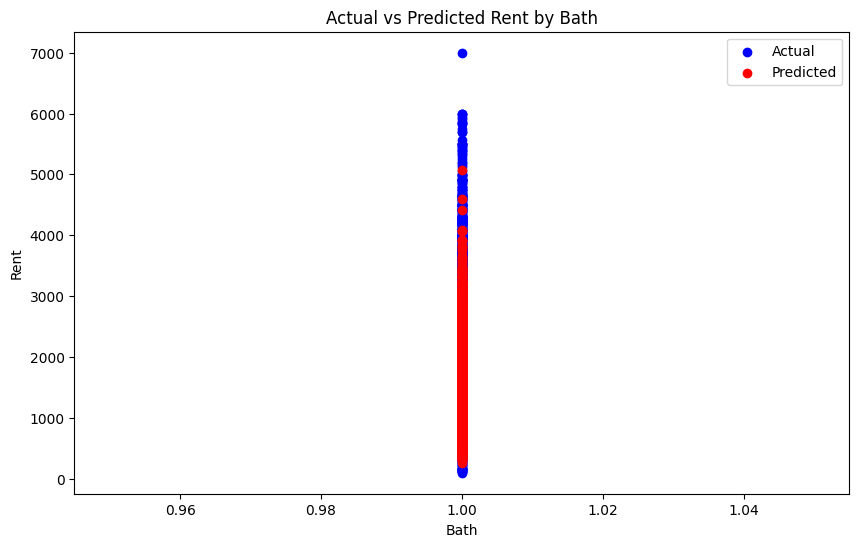

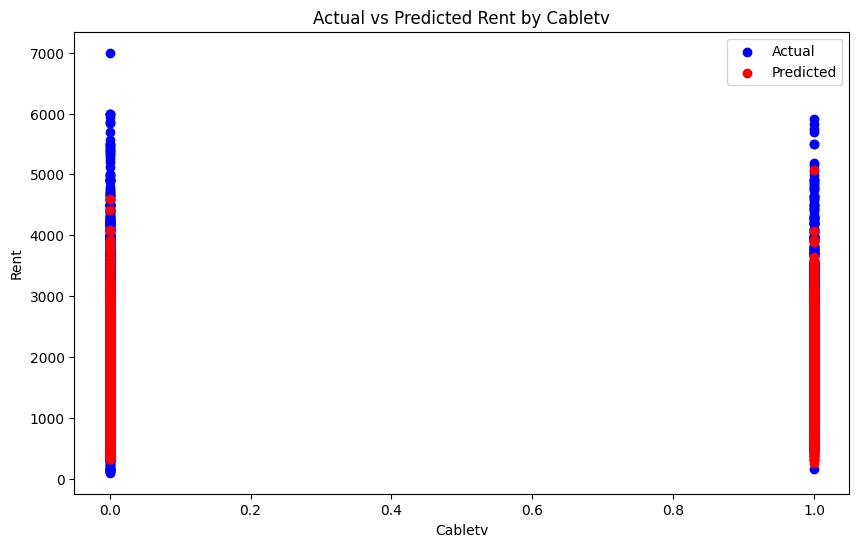

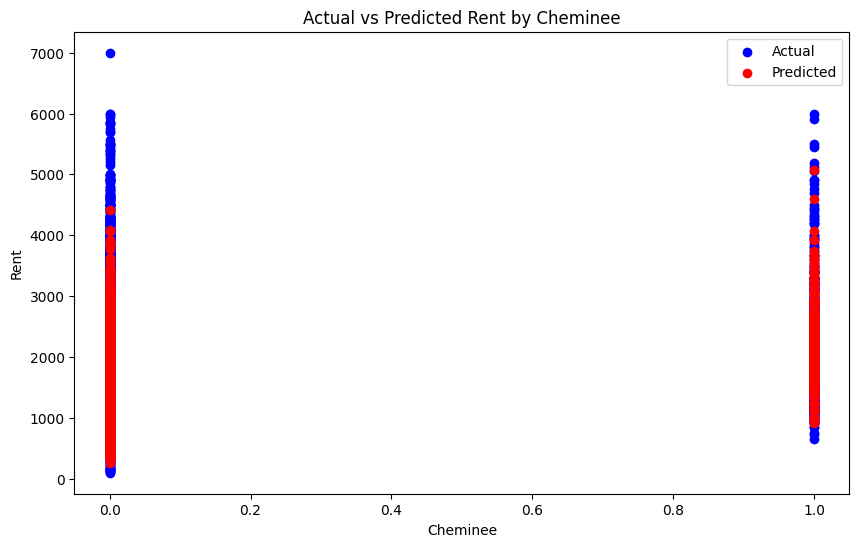

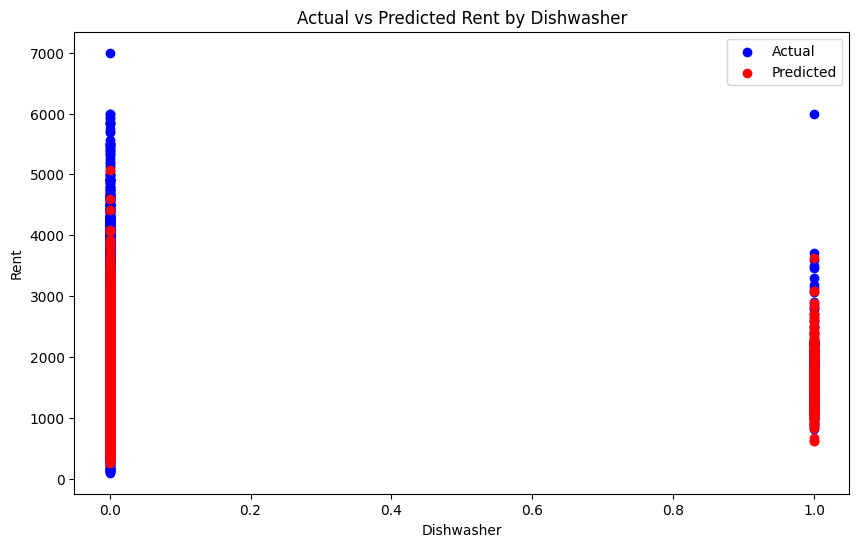

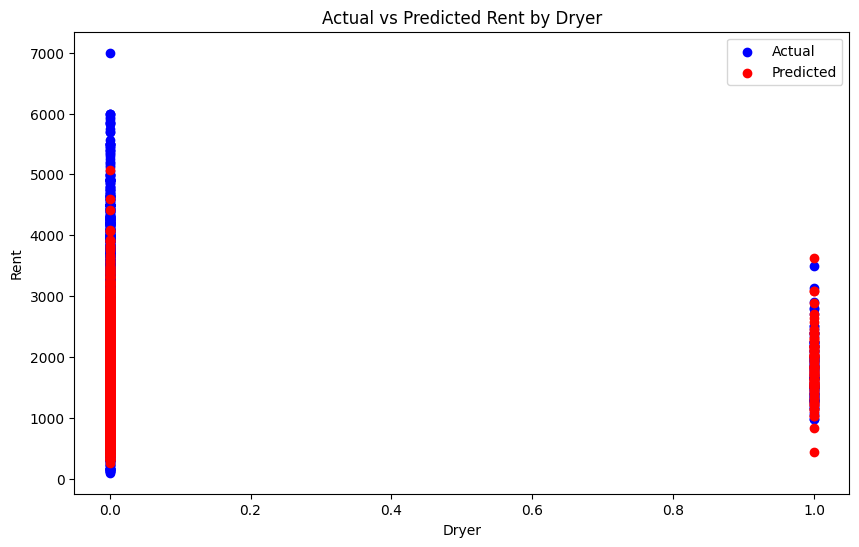

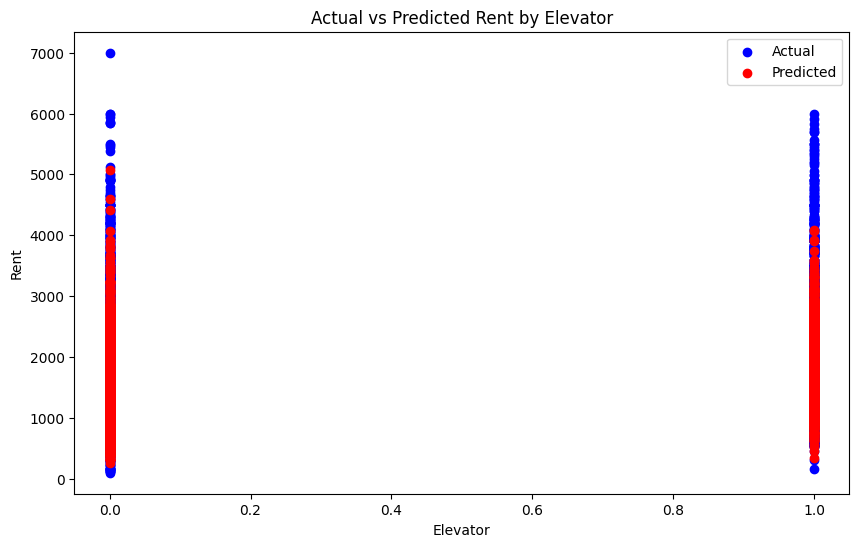

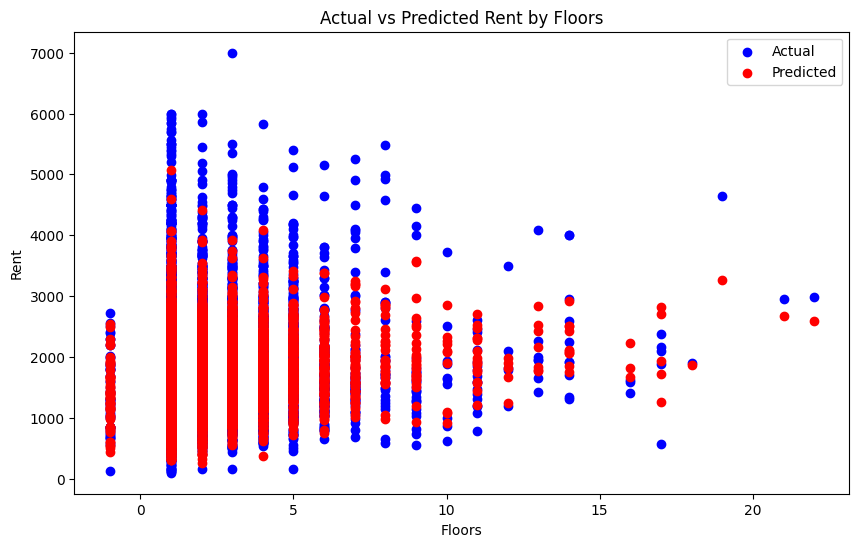

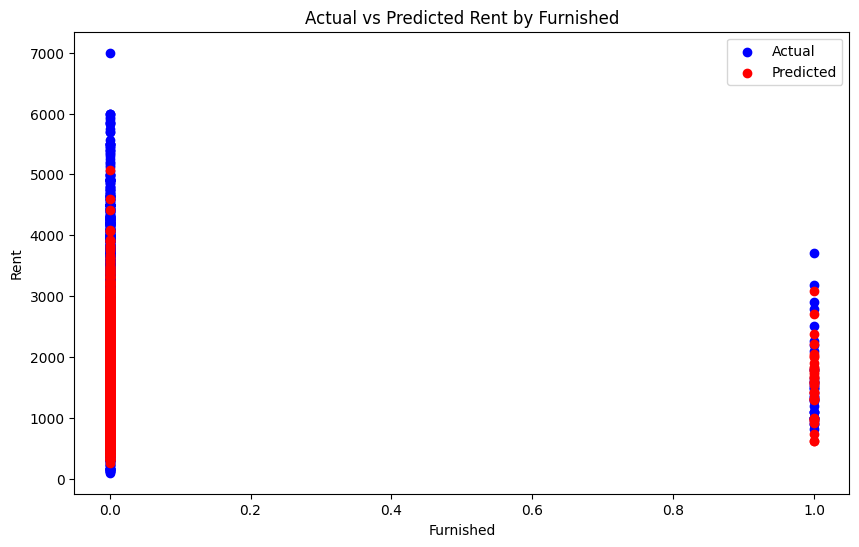

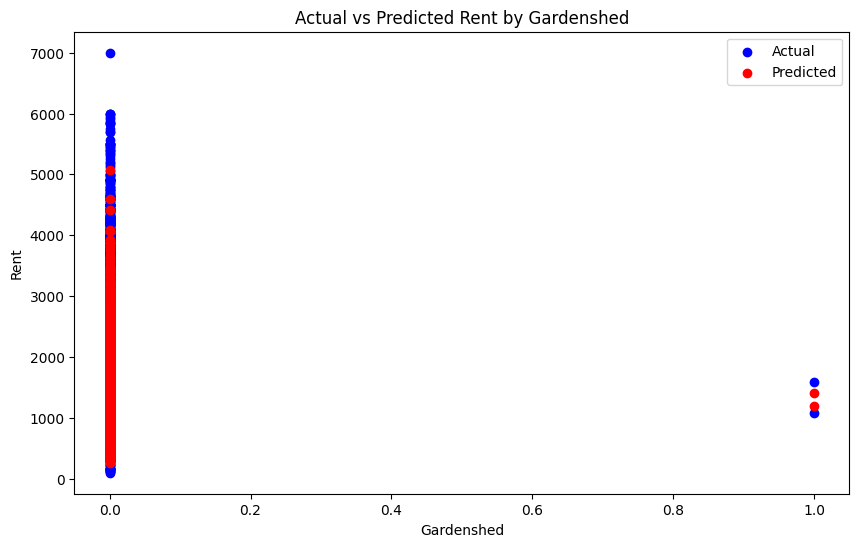

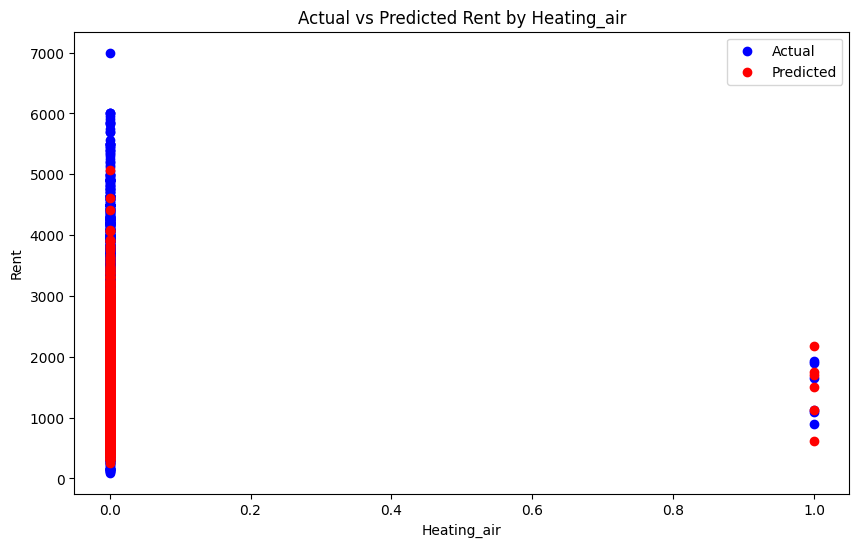

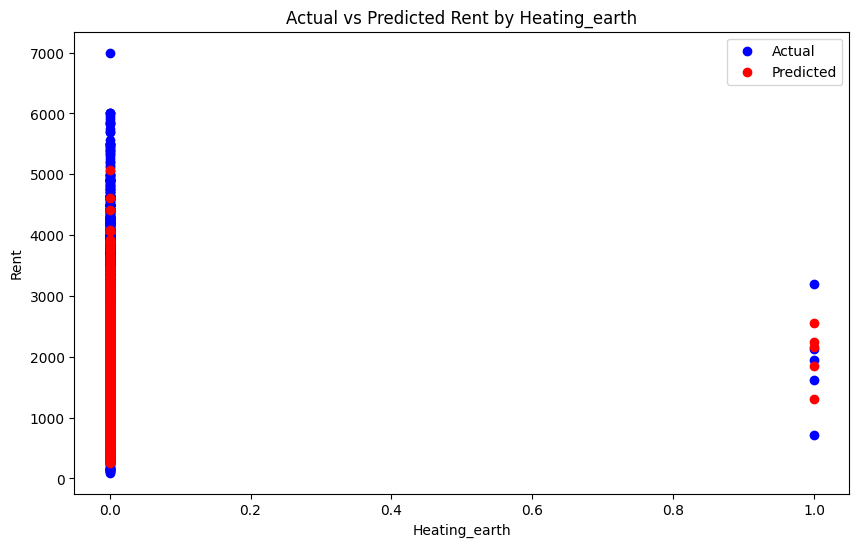

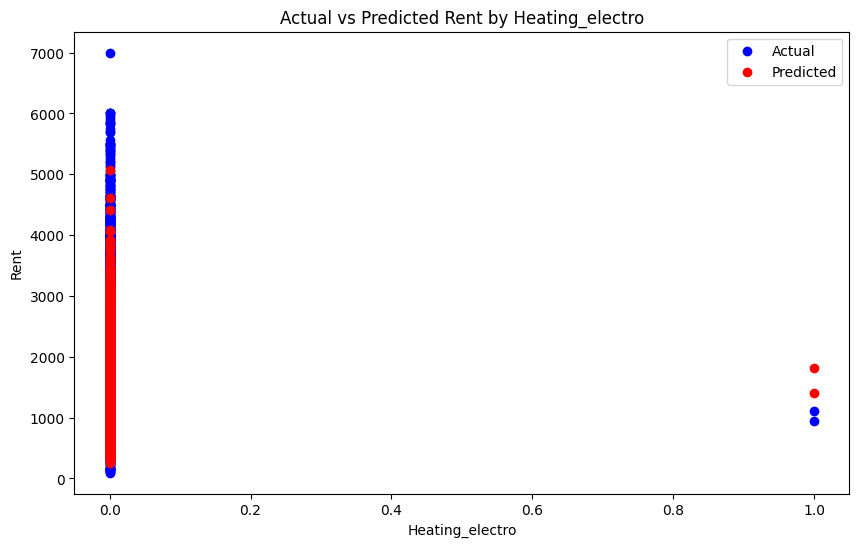

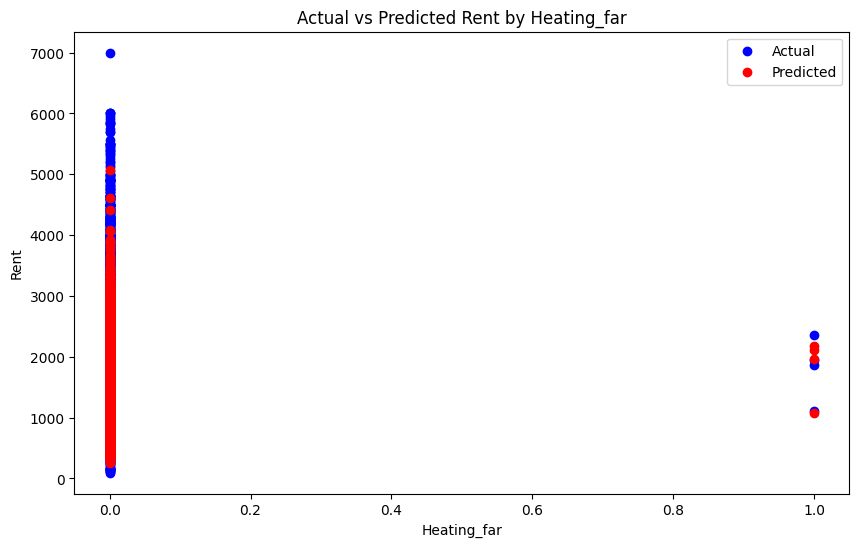

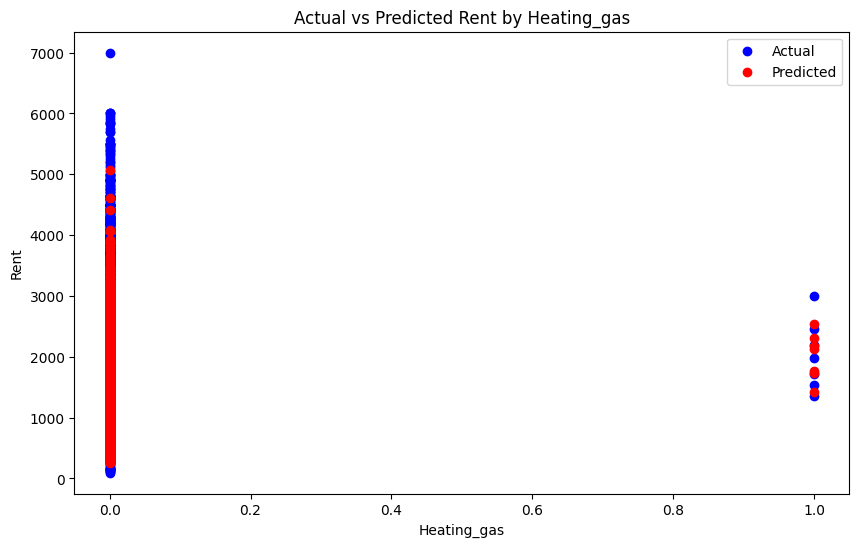

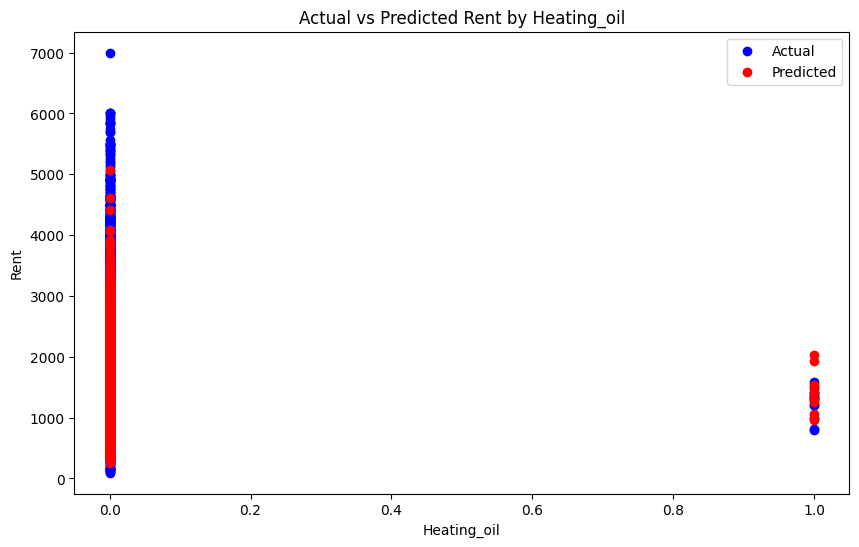

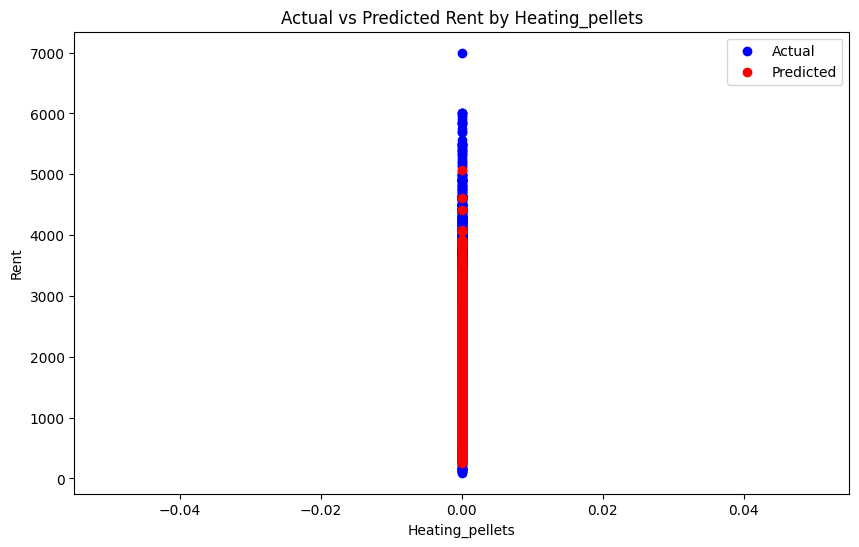

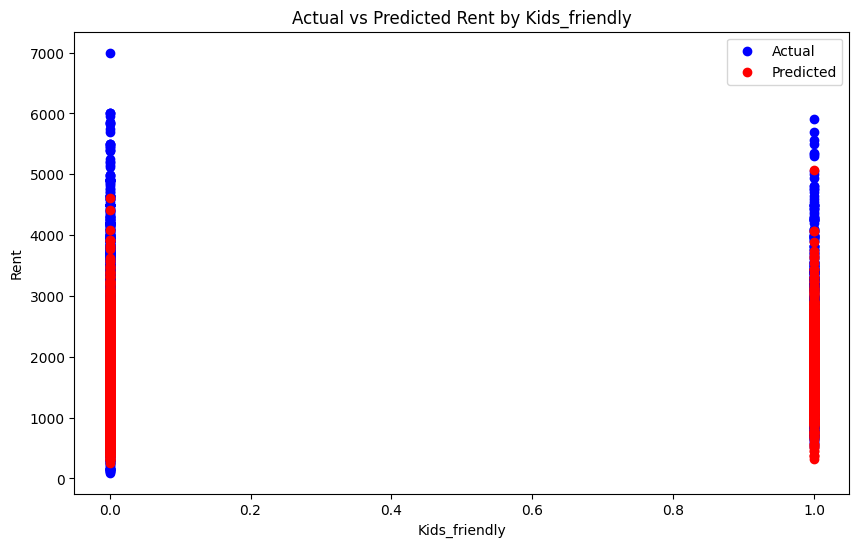

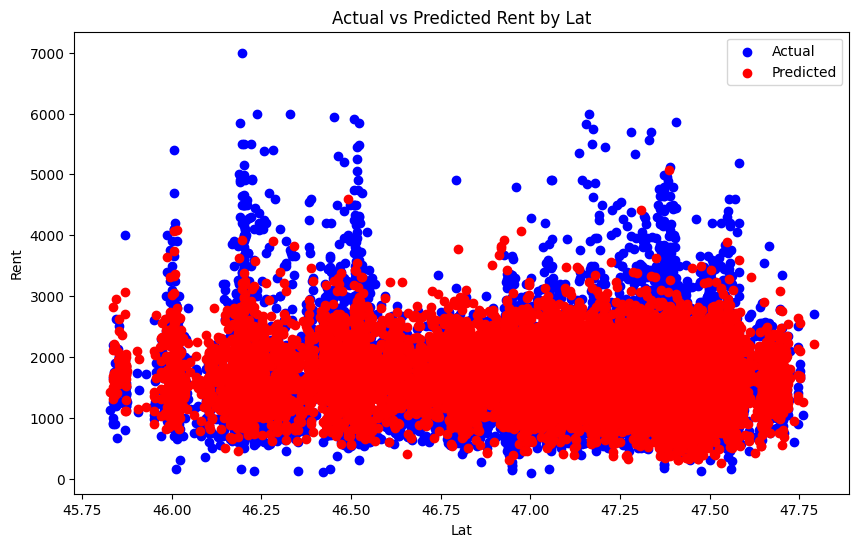

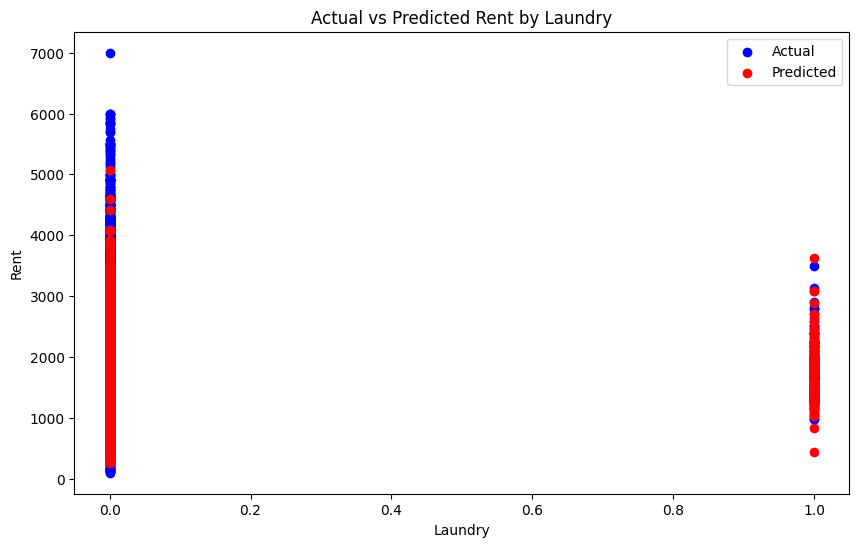

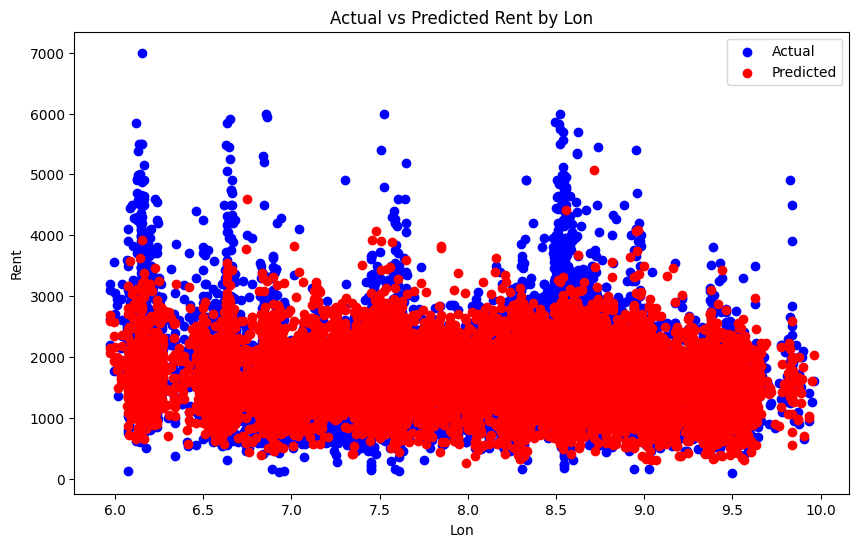

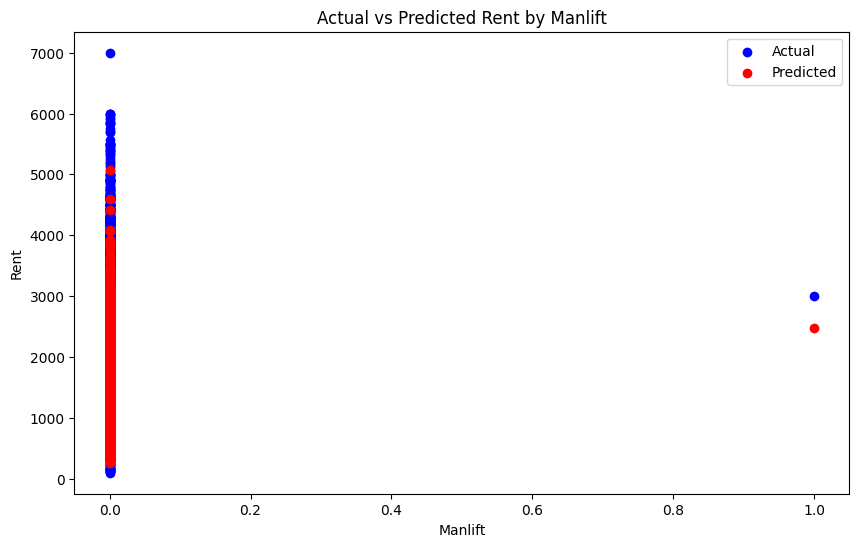

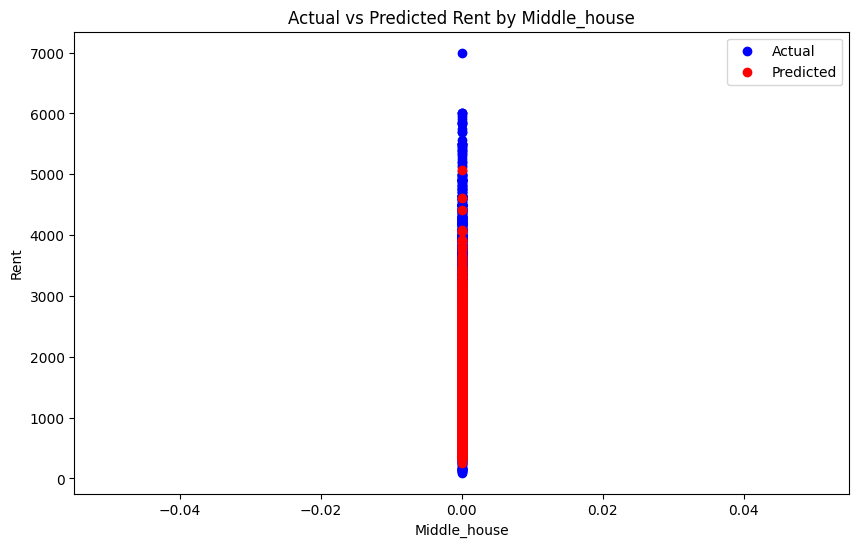

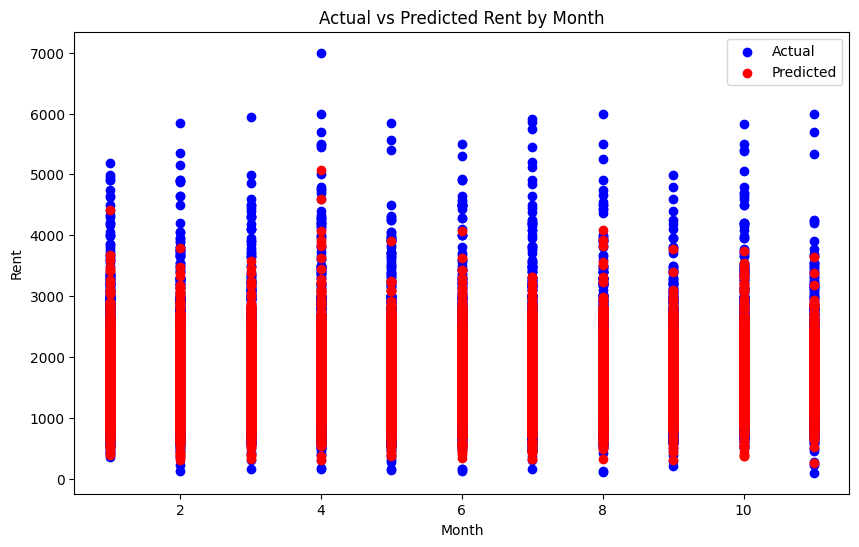

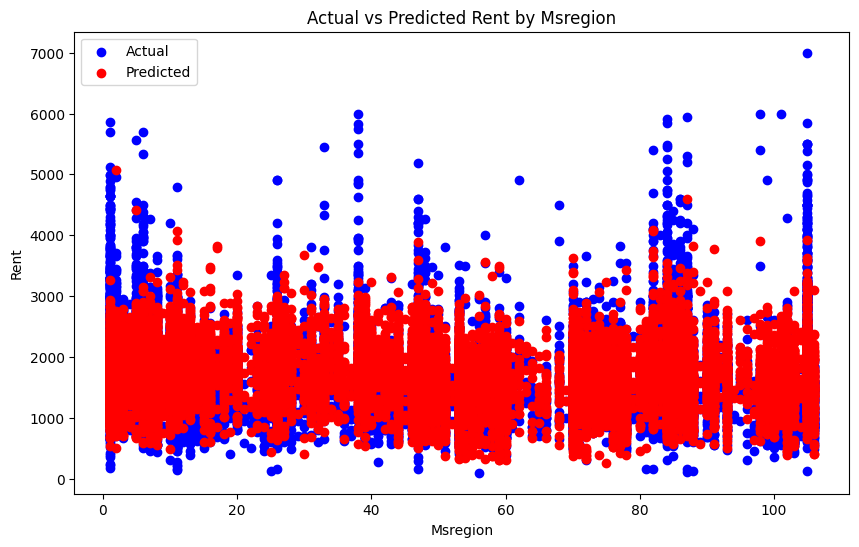

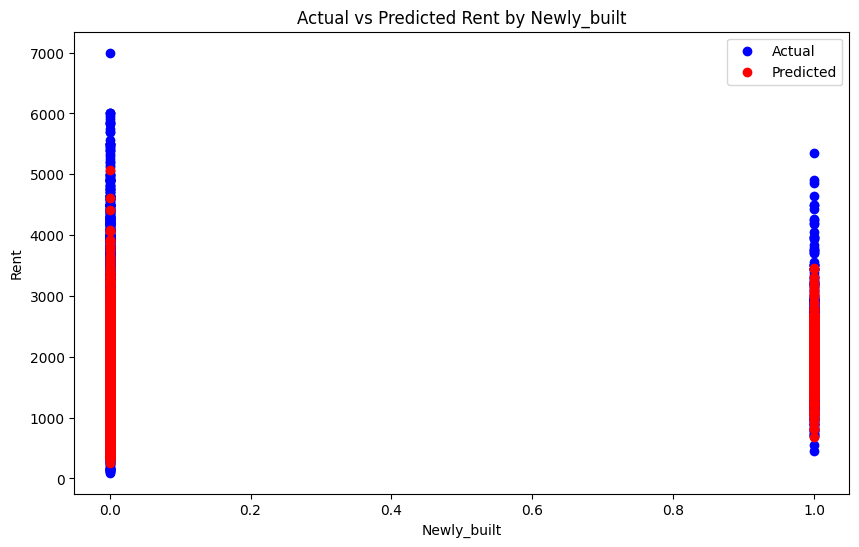

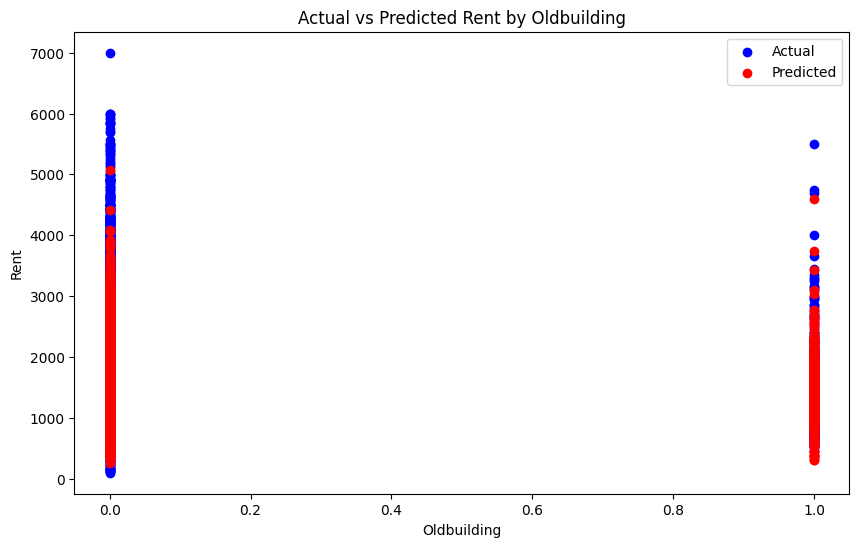

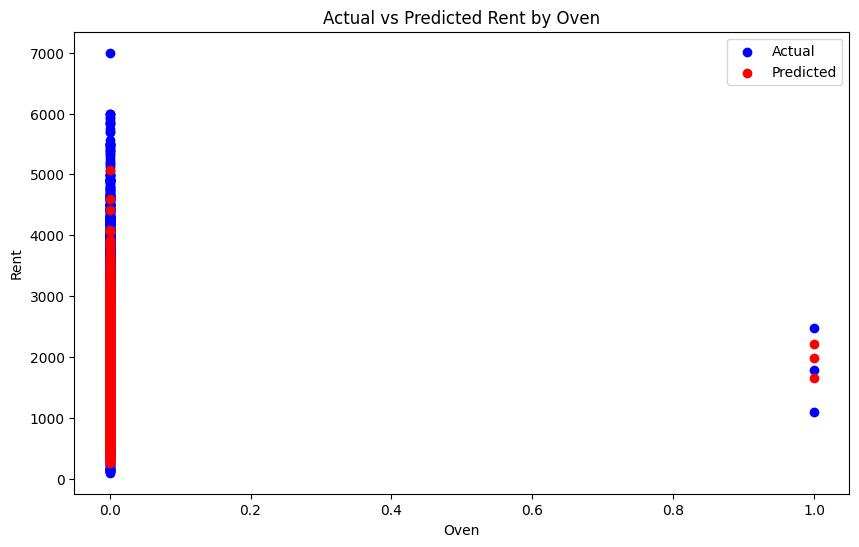

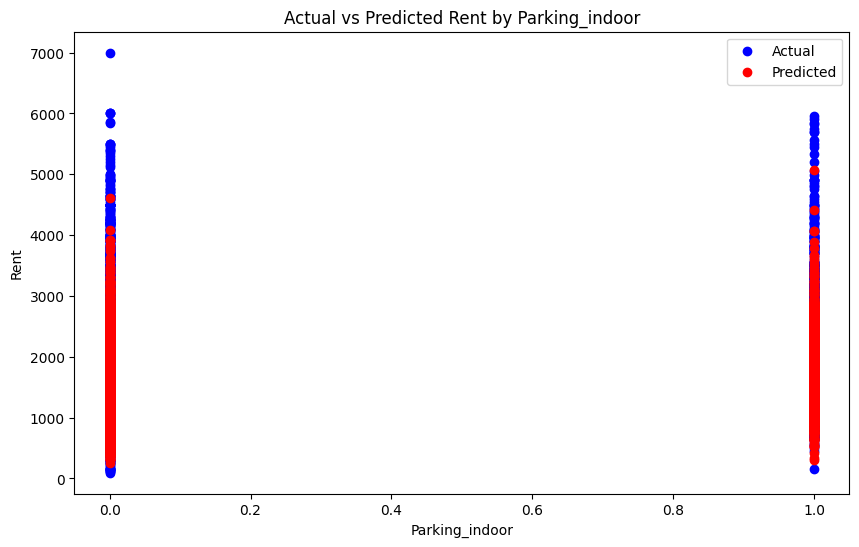

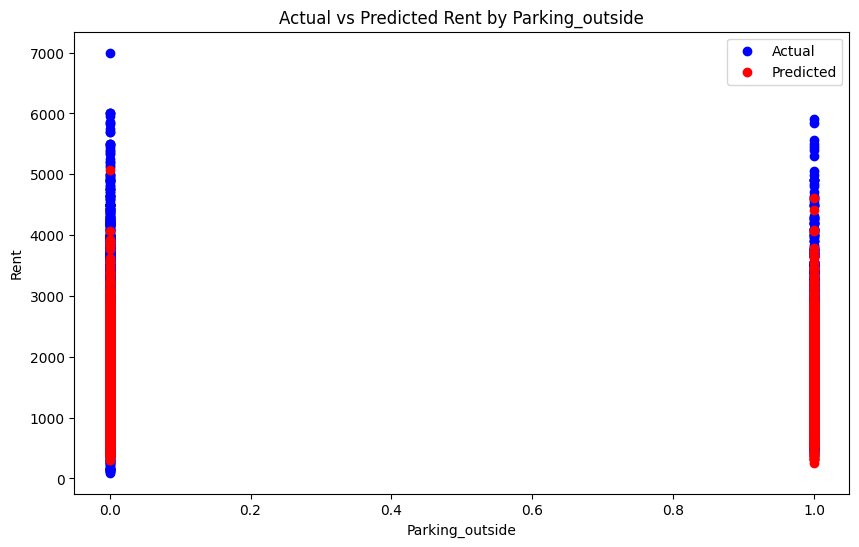

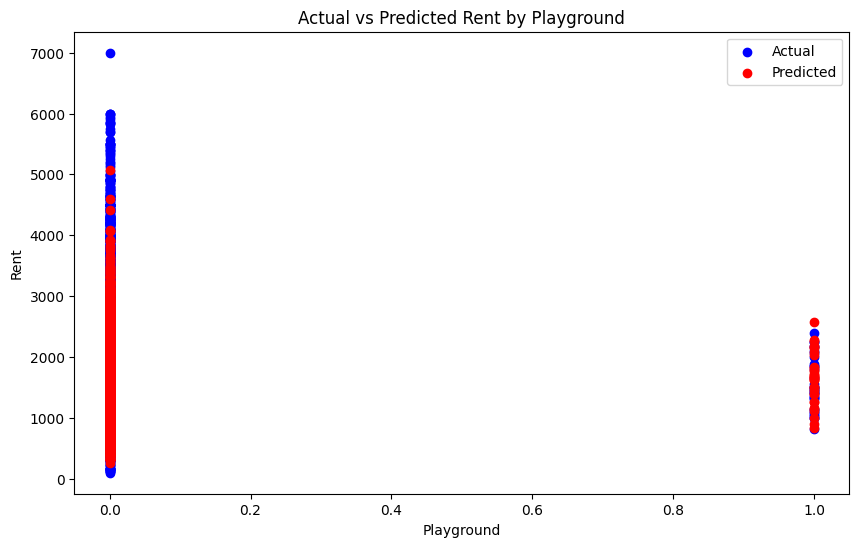

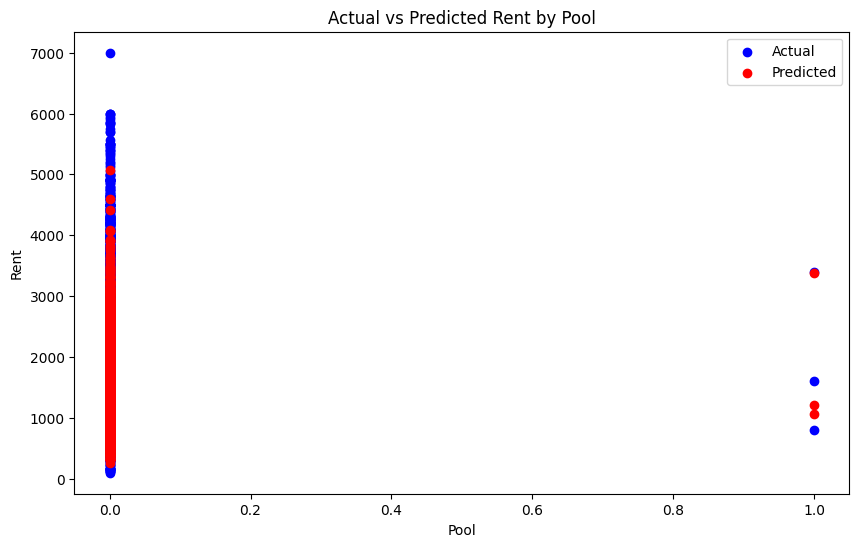

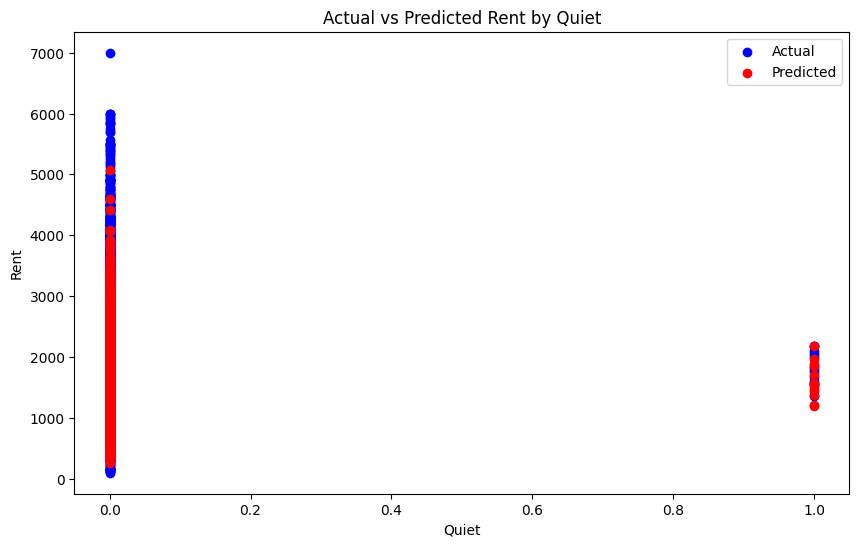

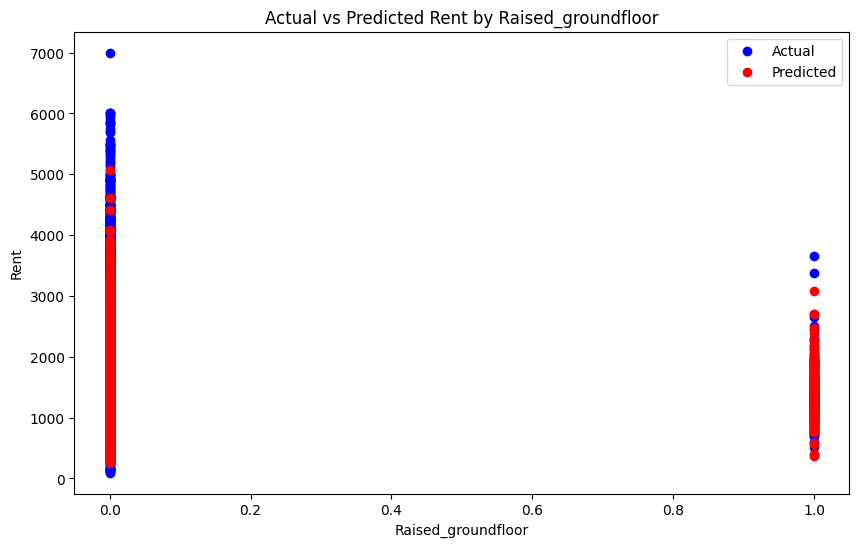

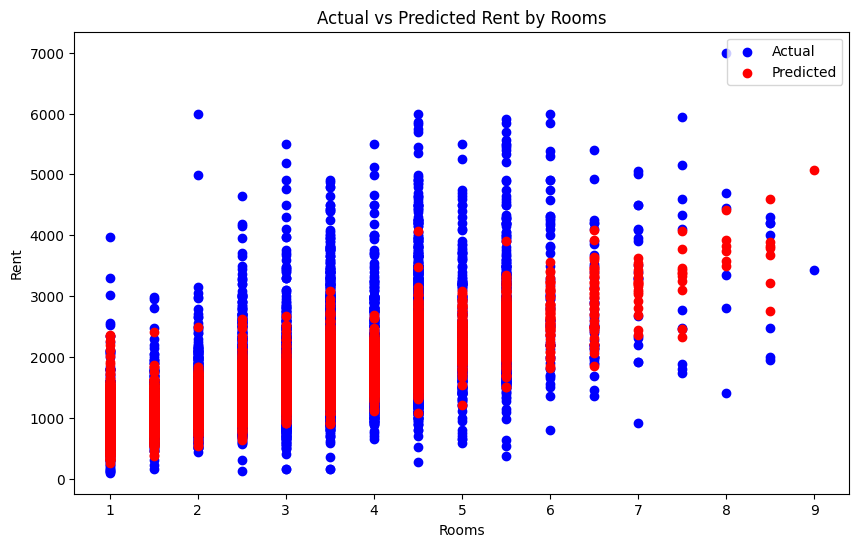

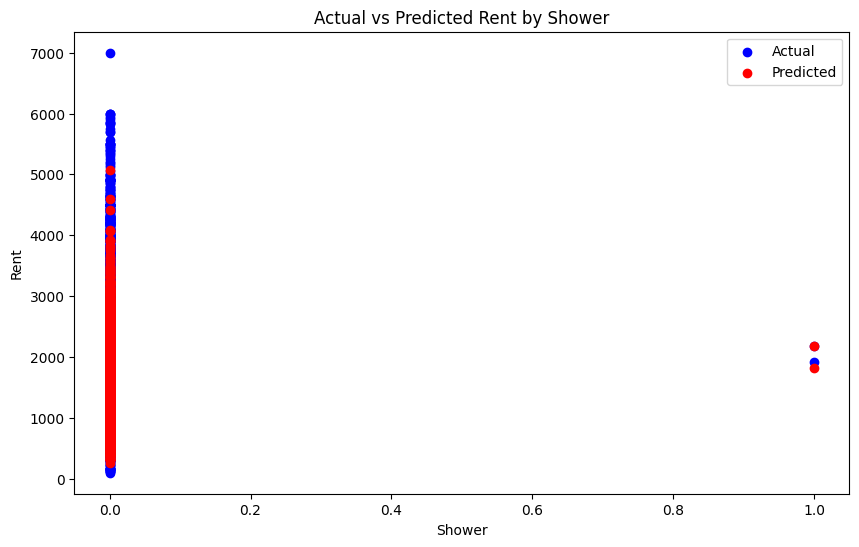

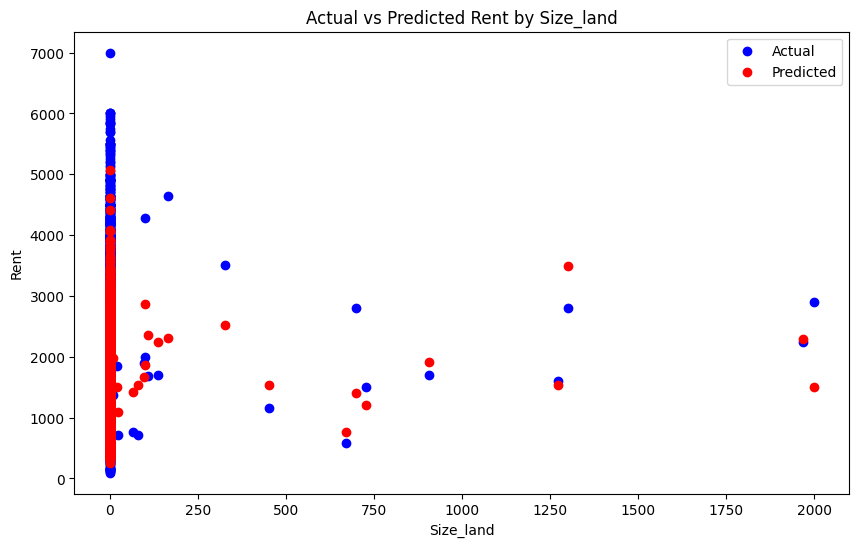

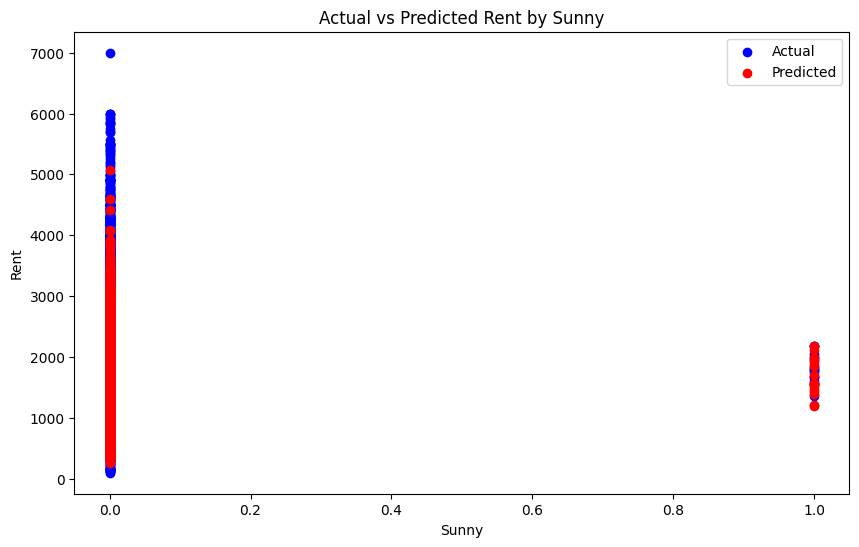

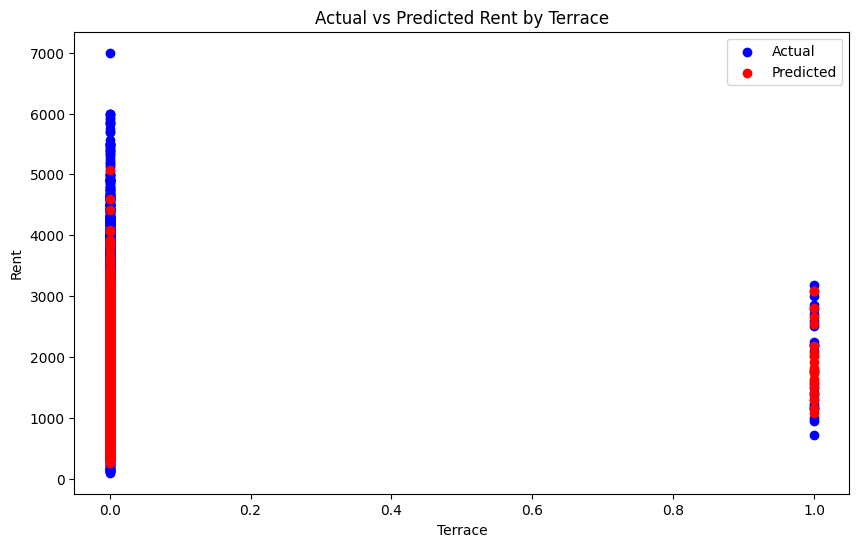

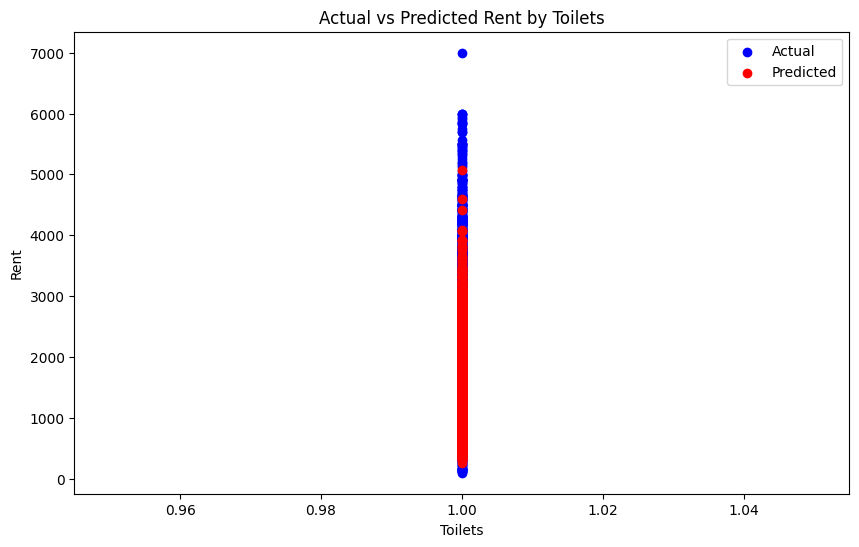

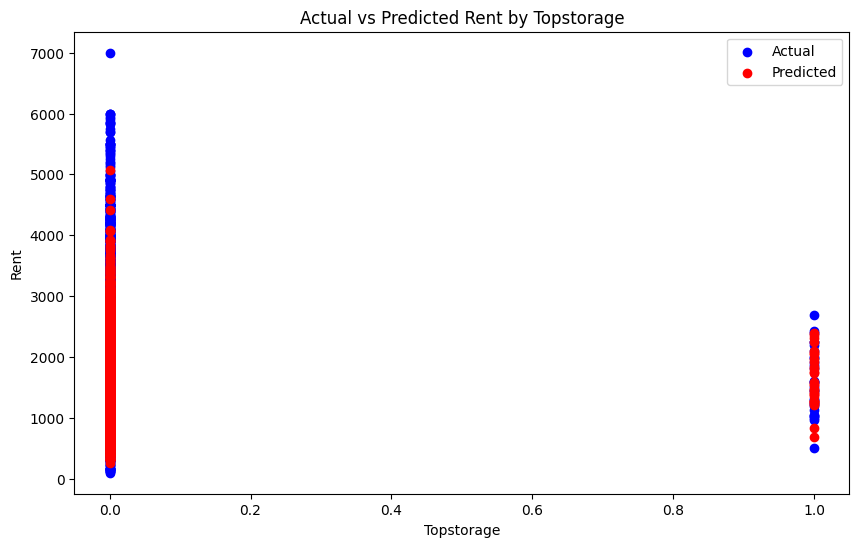

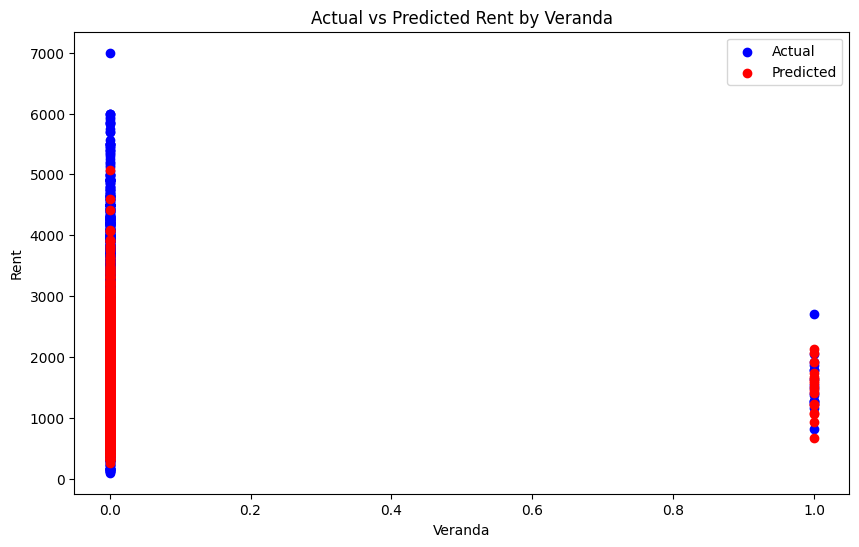

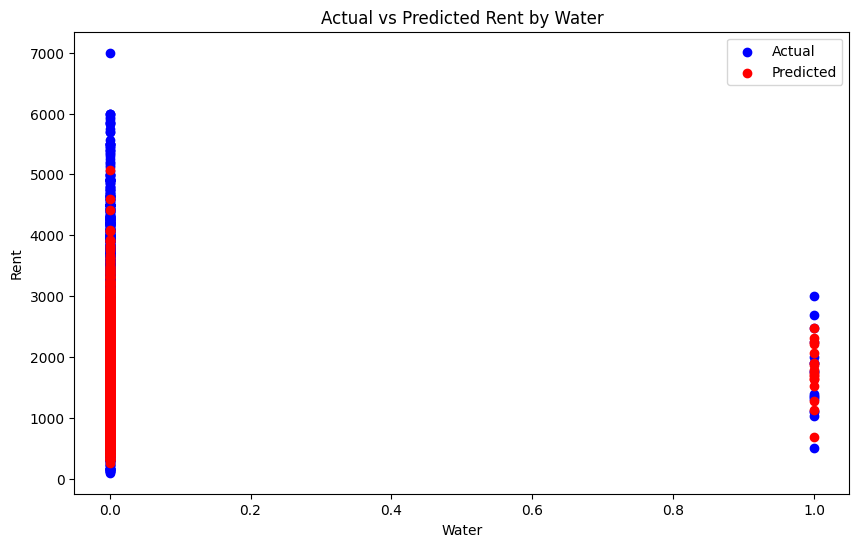

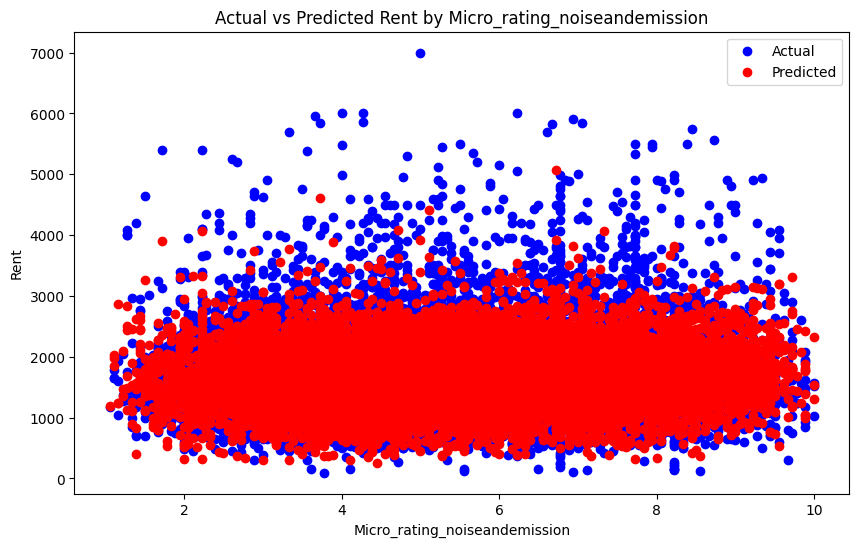

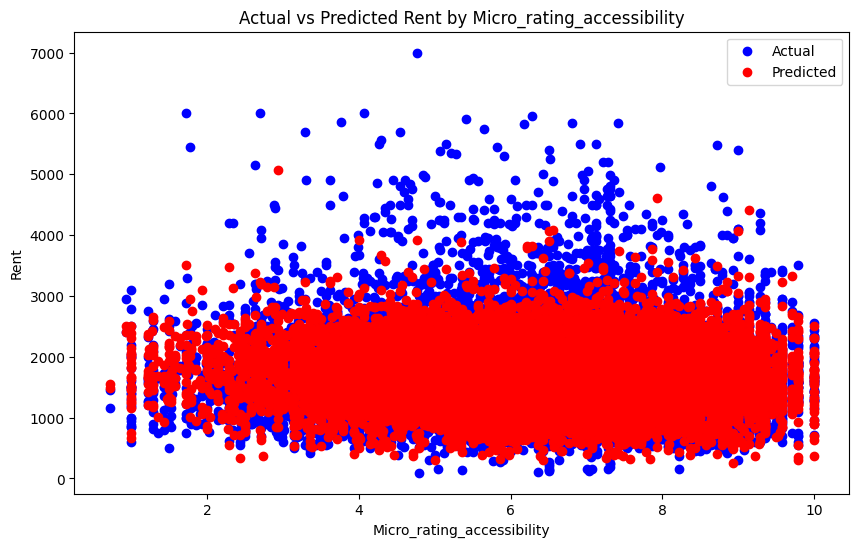

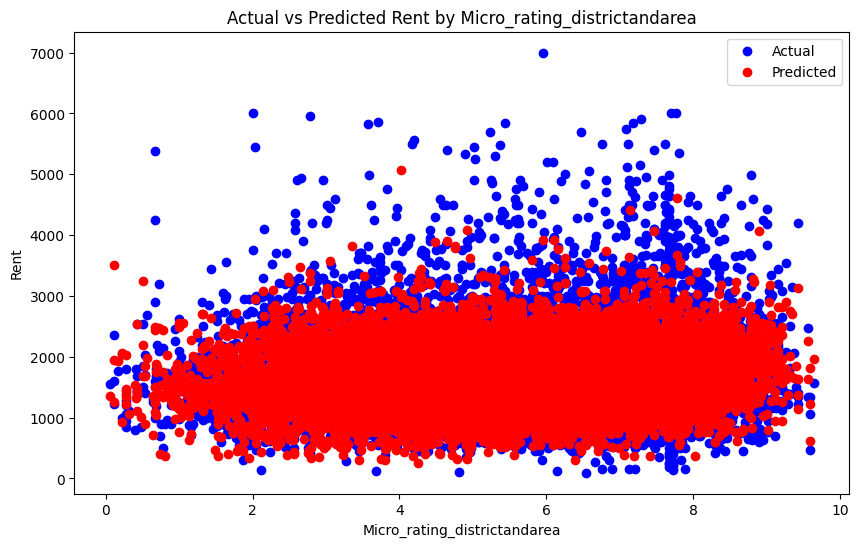

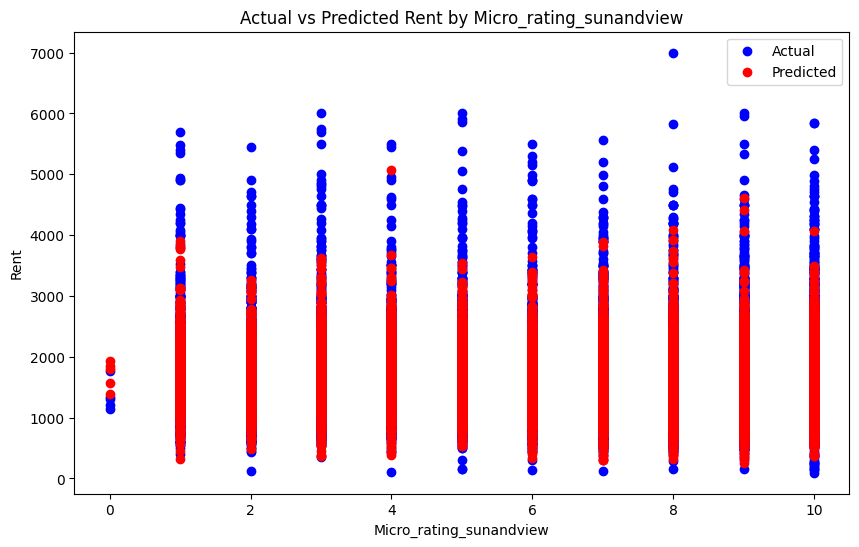

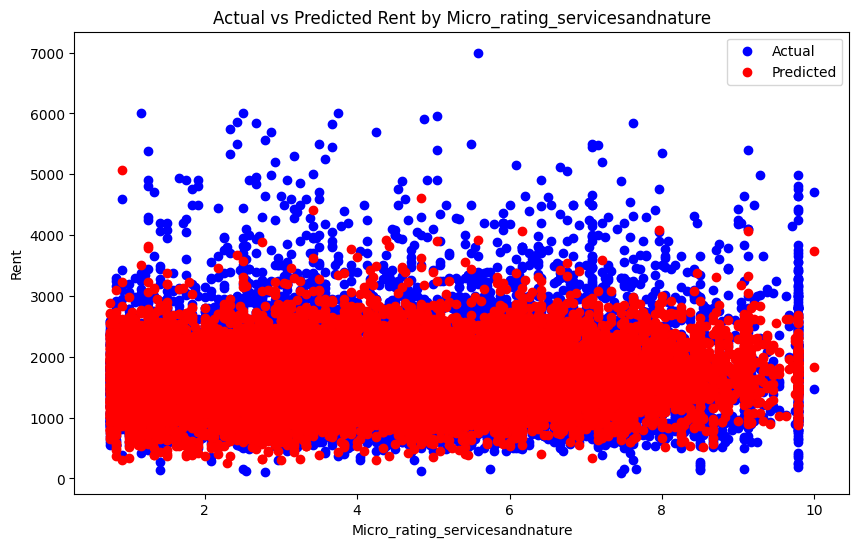

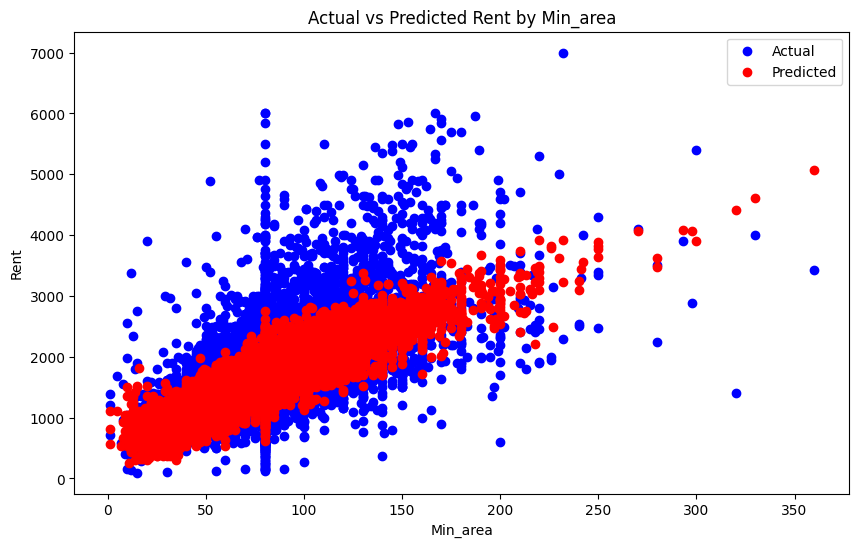

In [113]:
# Define the parameters list
column_to_exclude = 'rent_full'
params_list = [col for col in data.columns if col != column_to_exclude]


for param in params_list:

    plt.figure(figsize=(10, 6))

    plt.scatter(X_test[param], y_test, color='blue', label='Actual')

    plt.scatter(X_test[param], y_pred, color='red', label='Predicted')

    plt.title(f'Actual vs Predicted Rent by {param.capitalize()}')

    plt.xlabel(param.capitalize())

    plt.ylabel('Rent')

    plt.legend()

    plt.show()


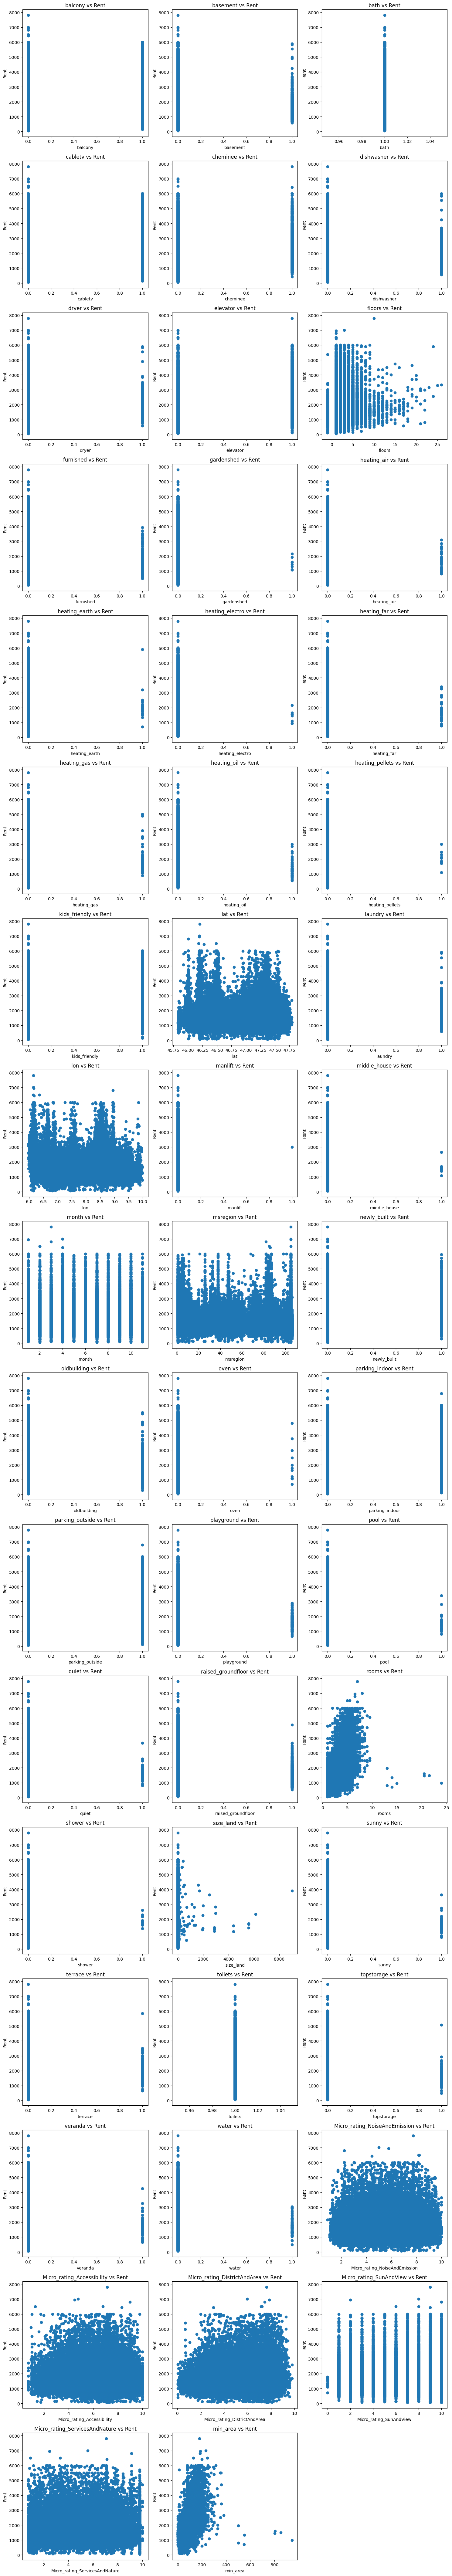